In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [9]:
# Import data
df = pd.read_excel(r'/Users/shirwetelfeel/Desktop/Data analysis /tasks/Data immersion/Achievment 6/Raw data/Furniture Superstore copy.xlsx')


In [11]:
df.head(5)

,Order ID,Order Date,Order Date (monthly),Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,IsFirstShopping,Rating,Customer Referrals,Complaint
0,ID-2017-JS1559559-41275,2017-01-01,2017-01-01,2017-01-05,Standard Class,JS-1559559,Jill Stevenson,Corporate,Medan,Sumatera Utara,...,627.1722,9,0.27,-51.6078,61.810,High,0,4,6,0
1,US-2017-KC1667555-41275,2017-01-01,2017-01-01,2017-01-05,Standard Class,KC-1667555,Kimberly Carter,Corporate,San Pedro Sula,Cortés,...,178.2480,2,0.70,-154.5120,28.412,High,1,4,18,0
2,CA-2017-AH10465140-41276,2017-01-02,2017-01-02,2017-01-07,Second Class,AH-104651402,Amy Hunt,Consumer,Dallas,Texas,...,1352.3976,9,0.32,-437.5404,119.720,Medium,0,3,8,0
3,MX-2017-NM1844539-41276,2017-01-02,2017-01-02,2017-01-07,Standard Class,NM-1844539,Nathan Mautz,Home Office,Apopa,San Salvador,...,116.2200,3,0.00,40.6200,19.151,High,0,4,0,0
4,ES-2017-EB1384045-41276,2017-01-02,2017-01-02,2017-01-08,Standard Class,EB-1384045,Ellis Ballard,Corporate,Montpellier,Languedoc-Roussillon-Midi-Pyrénées,...,50.2500,1,0.00,12.5400,9.290,Low,1,2,0,1


In [12]:
df.dtypes

Order ID                        object
Order Date              datetime64[ns]
Order Date (monthly)    datetime64[ns]
Ship Date               datetime64[ns]
Ship Mode                       object
Customer ID                     object
Customer Name                   object
Segment                         object
City                            object
State                           object
Country                         object
Region                          object
Market                          object
Product ID                      object
Sub-Category                    object
Product Name                    object
Sales                          float64
Quantity                         int64
Discount                       float64
Profit                         float64
Shipping Cost                  float64
Order Priority                  object
IsFirstShopping                  int64
Rating                           int64
Customer Referrals               int64
Complaint                

In [13]:
df.shape

(7465, 26)

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
data_1 = df[['Order Date (monthly)', 'Sales']]
data_1

,Order Date (monthly),Sales
0,2017-01-01,627.1722
1,2017-01-01,178.2480
2,2017-01-02,1352.3976
3,2017-01-02,116.2200
4,2017-01-02,50.2500
...,...,...
7460,2018-12-31,1091.2806
7461,2018-12-31,333.9000
7462,2018-12-31,78.1200
7463,2018-12-31,43.8000


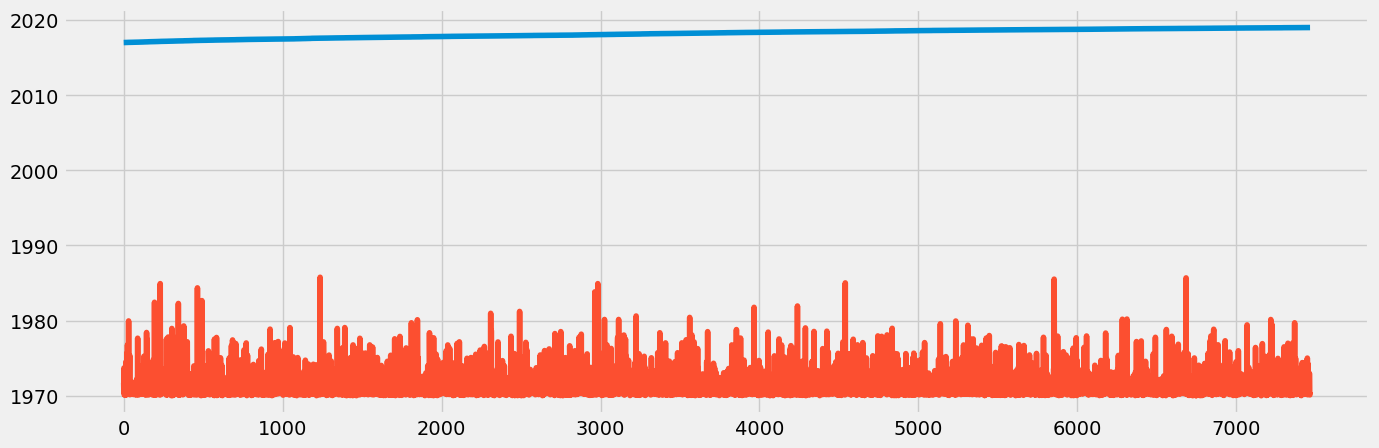

In [16]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data_1)

In [17]:
data_1.head()

,Order Date (monthly),Sales
0,2017-01-01,627.1722
1,2017-01-01,178.2480
2,2017-01-02,1352.3976
3,2017-01-02,116.2200
4,2017-01-02,50.2500


In [18]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data_1.reset_index()

In [19]:
data_2.head()

,index,Order Date (monthly),Sales
0,0,2017-01-01,627.1722
1,1,2017-01-01,178.2480
2,2,2017-01-02,1352.3976
3,3,2017-01-02,116.2200
4,4,2017-01-02,50.2500


In [20]:
data_sub = data_2.loc[(data_2['Order Date (monthly)'] >= '2017-01-01') & (data_2['Order Date (monthly)'] < '2018-12-31')]

In [21]:
data_sub.shape

(7451, 3)

In [22]:
data_sub.head()

,index,Order Date (monthly),Sales
0,0,2017-01-01,627.1722
1,1,2017-01-01,178.2480
2,2,2017-01-02,1352.3976
3,3,2017-01-02,116.2200
4,4,2017-01-02,50.2500


In [23]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Order Date (monthly)']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Order Date (monthly)'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,index,Sales
datetime,,
2017-01-01,0,627.1722
2017-01-01,1,178.2480
2017-01-02,2,1352.3976
2017-01-02,3,116.2200
2017-01-02,4,50.2500


In [28]:
data_sub= data_sub.drop(["index"], axis=1)

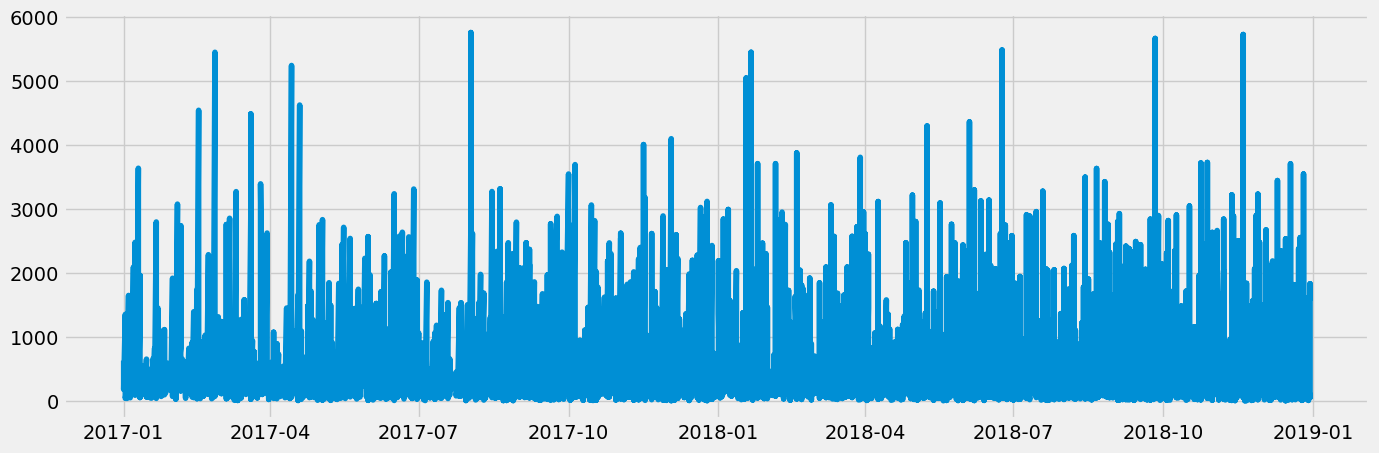

In [29]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [30]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Sales    0
dtype: int64

In [31]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

1801

In [60]:
data_sub["average"] = data_sub["Sales"].rolling(60).mean()
data_sub

,Sales,average
datetime,,
2017-01-01,627.1722,NaN
2017-01-01,178.2480,NaN
2017-01-02,1352.3976,NaN
2017-01-02,116.2200,NaN
2017-01-02,50.2500,NaN
...,...,...
2018-12-30,217.2000,414.966198
2018-12-30,1830.7800,429.203198
2018-12-30,166.1200,418.151532


In [61]:
data_sub.head(50)

,Sales,average
datetime,,
2017-01-01,627.1722,NaN
2017-01-01,178.2480,NaN
2017-01-02,1352.3976,NaN
2017-01-02,116.2200,NaN
2017-01-02,50.2500,NaN
2017-01-02,80.8320,NaN
2017-01-02,39.1560,NaN
2017-01-03,192.2200,NaN
2017-01-03,666.8400,NaN


In [62]:
data_sub.dropna()
data_sub_2 = data_sub.drop(["Sales"], axis=1)
data_sub_2
data_sub_2 = data_sub_2.dropna()

In [63]:
data_sub_2.isnull().sum()

average    0
dtype: int64

In [64]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub_2, model='additive', period=1)

In [65]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

In [66]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub_2['average'])

Dickey-Fuller Stationarity test:
Test Statistic                -9.631314e+00
p-value                        1.609400e-16
Number of Lags Used            3.600000e+01
Number of Observations Used    7.355000e+03
Critical Value (1%)           -3.431239e+00
Critical Value (5%)           -2.861933e+00
Critical Value (10%)          -2.566979e+00
dtype: float64


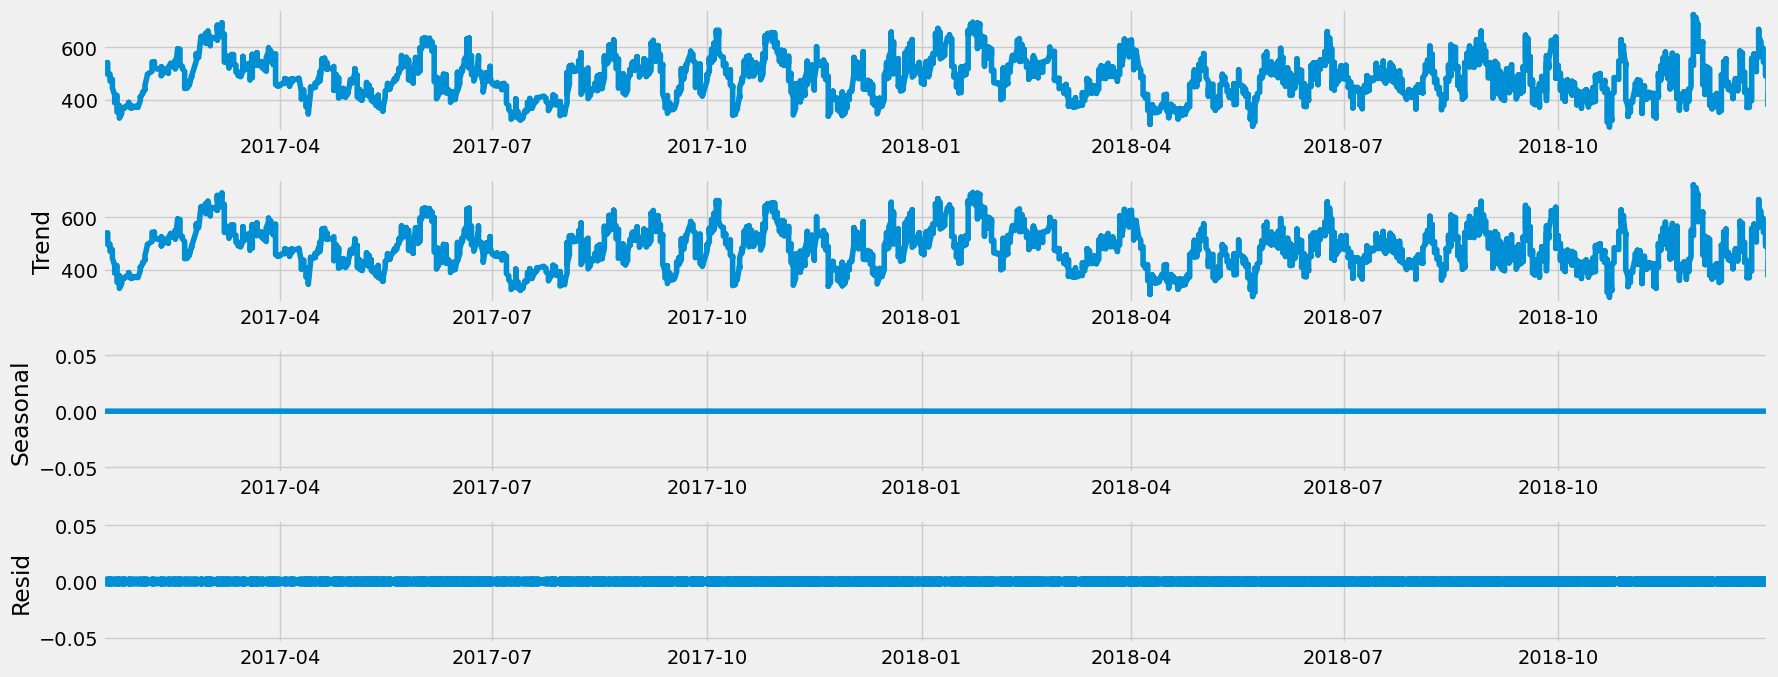

In [67]:
decomposition.plot()
plt.show()

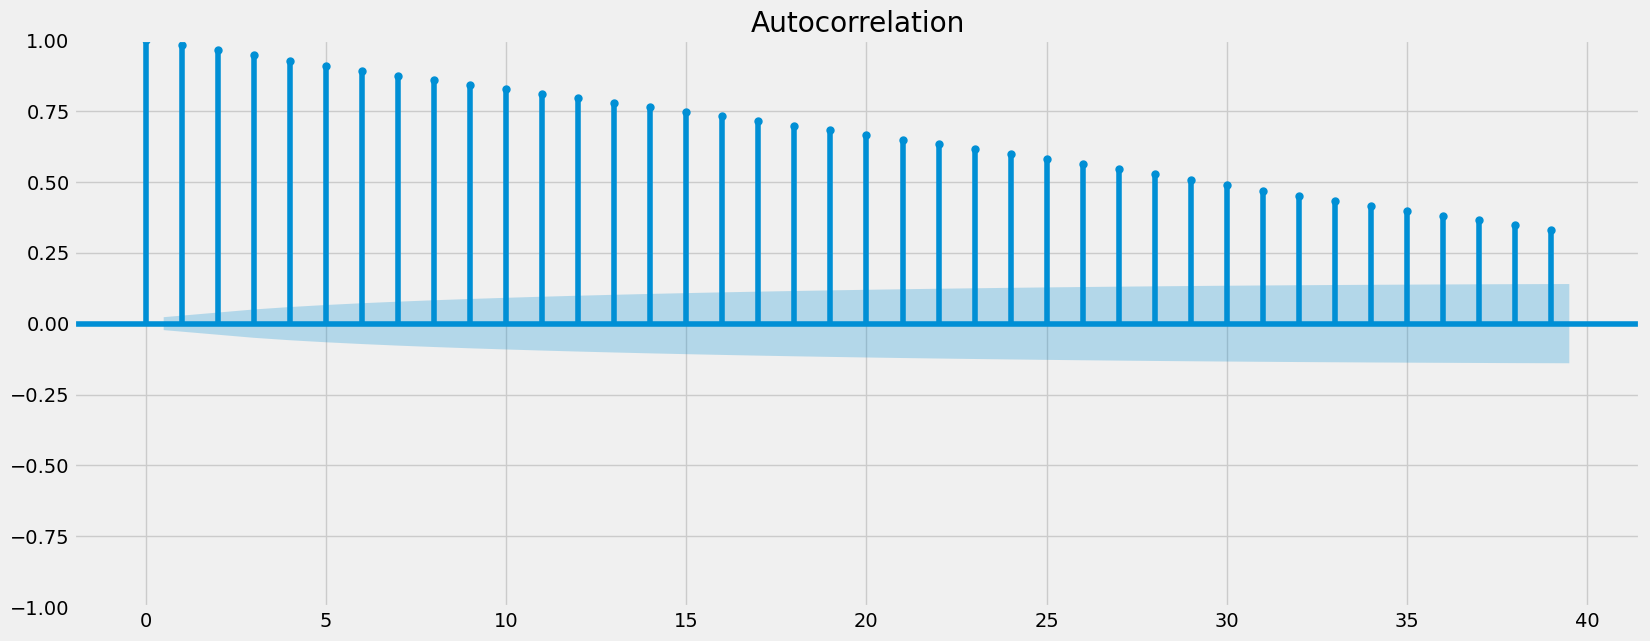

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_sub_2)
plt.show()

In [69]:
data_diff = data_sub_2 - data_sub_2.shift(1)

In [70]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [71]:
data_diff.head()

,average
datetime,
2017-01-15,-3.197970
2017-01-15,-1.938133
2017-01-15,-17.493960
2017-01-15,2.487000
2017-01-15,5.207000


In [72]:
data_diff.columns

Index(['average'], dtype='object')

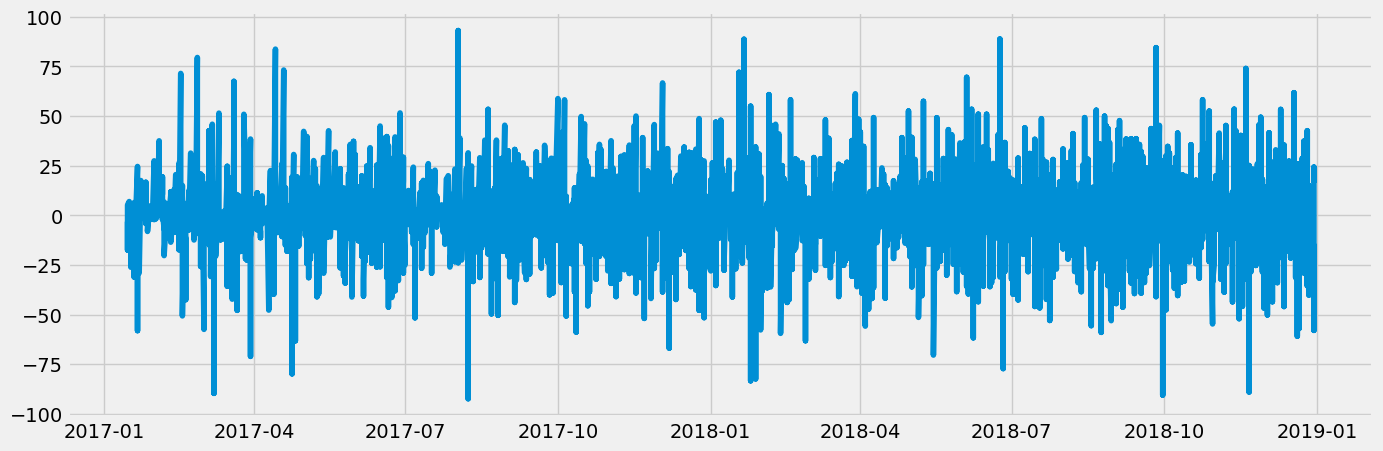

In [73]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [74]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -22.633842
p-value                           0.000000
Number of Lags Used              14.000000
Number of Observations Used    7376.000000
Critical Value (1%)              -3.431237
Critical Value (5%)              -2.861932
Critical Value (10%)             -2.566979
dtype: float64


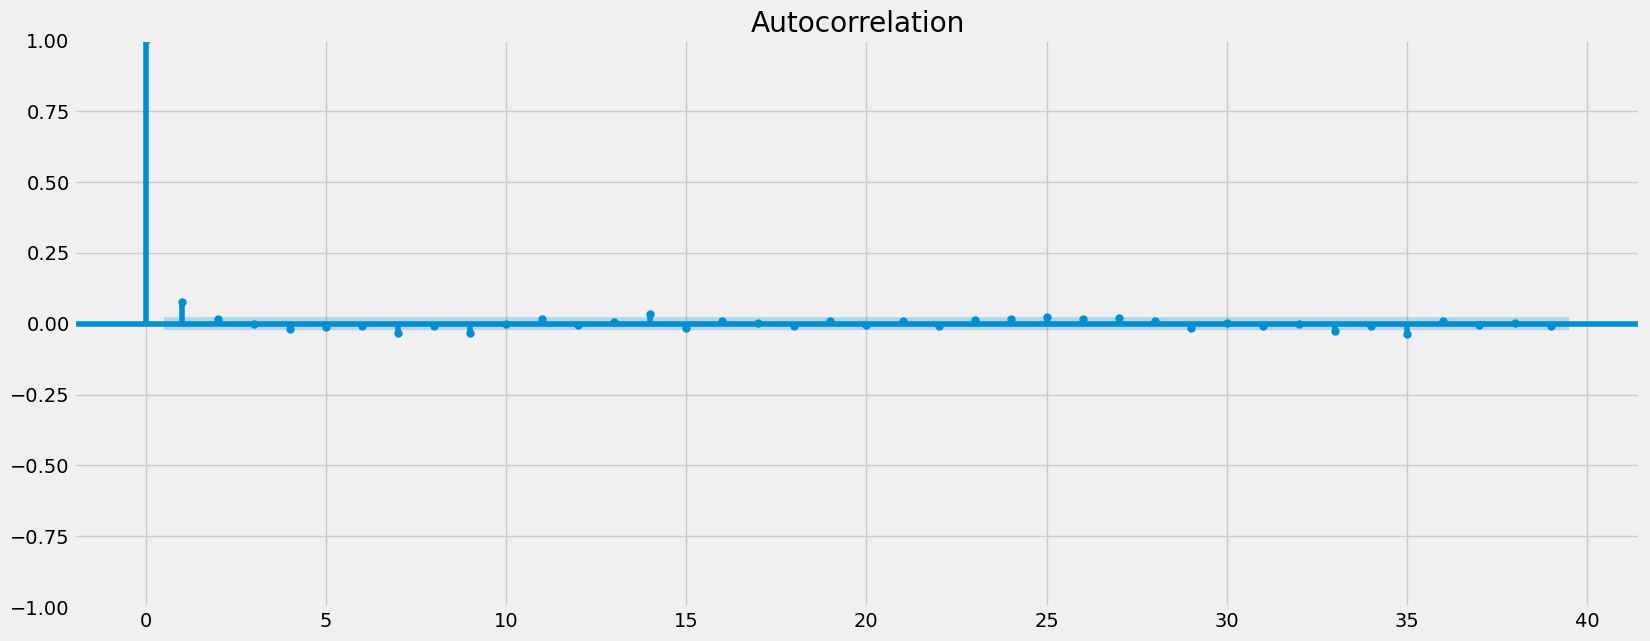

In [75]:
plot_acf(data_diff)
plt.show()

In [76]:
##there is no corelation maybe becuase the data is made for two years only